In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk1-task3-earthquakes.ipynb")

# Task 3: `pandas` fundamentals with earthquake data

## Instructions
- First, update the following cell to have a link to *your* Homework 1 GitHub repository:

**UPDATE THIS LINK:**

[https://github.com/stephenccodes/eds220-hwk1](https://github.com/stephenccodes/eds220-hwk1)

- This task covers topics on the lessons on [subsetting `pandas.DataFrames`](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-3-pandas-subsetting/lesson-3-pandas-subsetting.html) and [plotting](). The best strategy to solve it is to get together with your classmates and work on it together after these lecture.

- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits at moments you think are adequate.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with `otter` import** this is used internally for grading.


## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is given in a single CSV file within the`data` folder (`data/earthquake_data.csv`) and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

<!-- BEGIN QUESTION -->

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it in the `raw_eqk` variable.


In [36]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_eqk = pd.read_csv('data/earthquake_data.csv')

<!-- END QUESTION -->

Look at the head of the dataframe. Store the result in the `raw_eqk_head` variable. 

In [2]:
# Assign the code to view the first five rows of the data frame to a variable
raw_eqk_head = raw_eqk.head()

In [3]:
# View the dataframe
raw_eqk_head

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe. Store your answer in the `raw_ekq_shape` variable.

In [4]:
# Print the shape of the data frame
print(raw_eqk.shape)

# Assign the code to a variable
raw_eqk_shape = raw_eqk.shape

(120108, 8)


b. Store the type of `raw_eqk`'s shape in the `raw_eqk_shape_type` variable.

In [5]:
# Assign the code to find the shape of the 'raw_eqk' data frame to a variable
raw_eqk_shape_type = type(raw_eqk_shape)

In [6]:
# View the dataframe
raw_eqk_shape_type

tuple

c. Extract *only* the number of rows by accessing it from `raw_eqk`'s shape.Store your answer in the `num_rows` variable.  HINT: how do you index an element in a tuple?

In [9]:
# Extract the number of rows in 'raw_eqk'
print(raw_eqk_shape[0])

# Asssign the code to find the number of rows from 'raw_eqk_shape' to a variable
num_rows = raw_eqk_shape[0]

120108


## 3

Get the unique values of the type of events. Store your answer in the `unique_events` variable.

In [12]:
# Find the unique values of the 'type' column and assign it to a variable
unique_events = raw_eqk['type'].unique()

# 4

a. Select only earthquake events and store them as `eqk` (variable name). Update the index of `eqk` to be the `id` column of the dataframe. 

In [20]:
# Select only the observations where 'type' is 'earthquake' and assign 'id' as the index
eqk = raw_eqk[raw_eqk['type'] == 'earthquake'].set_index('id')

In [21]:
# View the dataframe
eqk

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,"9km WNW of Cobb, California",earthquake


b. Check the new index by viewing the first 3 rows of `eqk`. Store your results in the `eqk_3` variable. 

In [25]:
# Show the first three rows of 'eqk'
eqk_3 = eqk.head(3)

In [24]:
# View the dataframe
eqk_3

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? Store your answer in the `ommitted_events` variable. 

HINT: There are *many* ways you can get this information. One could be to use (2). 

In [32]:
# Print the length of all observations that do not have 'earthquake' in the 'type column'
print(len(raw_eqk[raw_eqk['type'] != 'earthquake']))

# Assign this to an element
omitted_events = len(raw_eqk[raw_eqk['type'] != 'earthquake'])

1710


<!-- BEGIN QUESTION -->

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

Text(0.5, 1.0, 'Frequency of Earthquakes of Different Magnitudes')

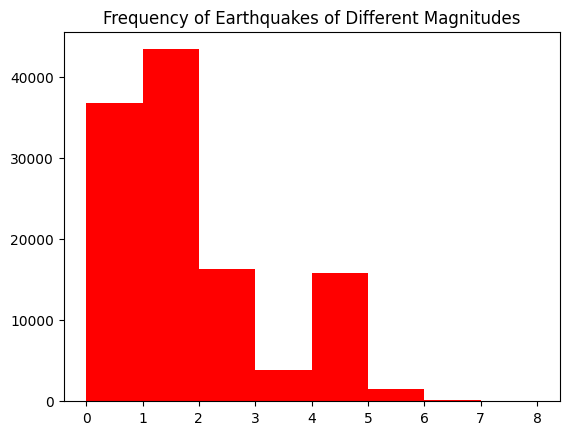

In [49]:
# Make a histogram
plt.hist(data = eqk,
         bins = [0, 1, 2, 3, 4, 5, 6, 7, 8], # Make bins for the relevant values
         x = 'mag',
        color = "red")
plt.title('Frequency of Earthquakes of Different Magnitudes') # Add a title

<!-- END QUESTION -->

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: check the method [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

In [ ]:
top20 = ...

In [ ]:
# View the dataframe 
top20

<!-- BEGIN QUESTION -->

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

# 8 
We are interested in the place, magnitude, and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame. Store your answer in the `top20_filtered` variable. 

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [ ]:
top20_filtered = ...

In [ ]:
# View the dataframe
top20_filtered

<!-- BEGIN QUESTION -->

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<!-- END QUESTION -->

